HAHA, das ist ein Test

# A2 Skript- und Datenvorbereitung (10%)

## 2.1 Einbindung der grundlegenden Python-Bibliotheken

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier,  GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,  classification_report
#from sklearn import decomposition
#from sklearn import datasets
#from sklearn.cluster import KMeans
#from sklearn.preprocessing import MinMaxScaler
#import statsmodels.api as sm

## 2.2 Datensatz einlesen und Überblick verschaffen (Größe, Attribute, Datentypen, etc.)

In [2]:
df = pd.read_csv('heart_failure_clinical_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
df = df.drop(columns=["time"])

In [4]:
print(f'{df["DEATH_EVENT"].sum()}') # 96 tot, rest lebt

96


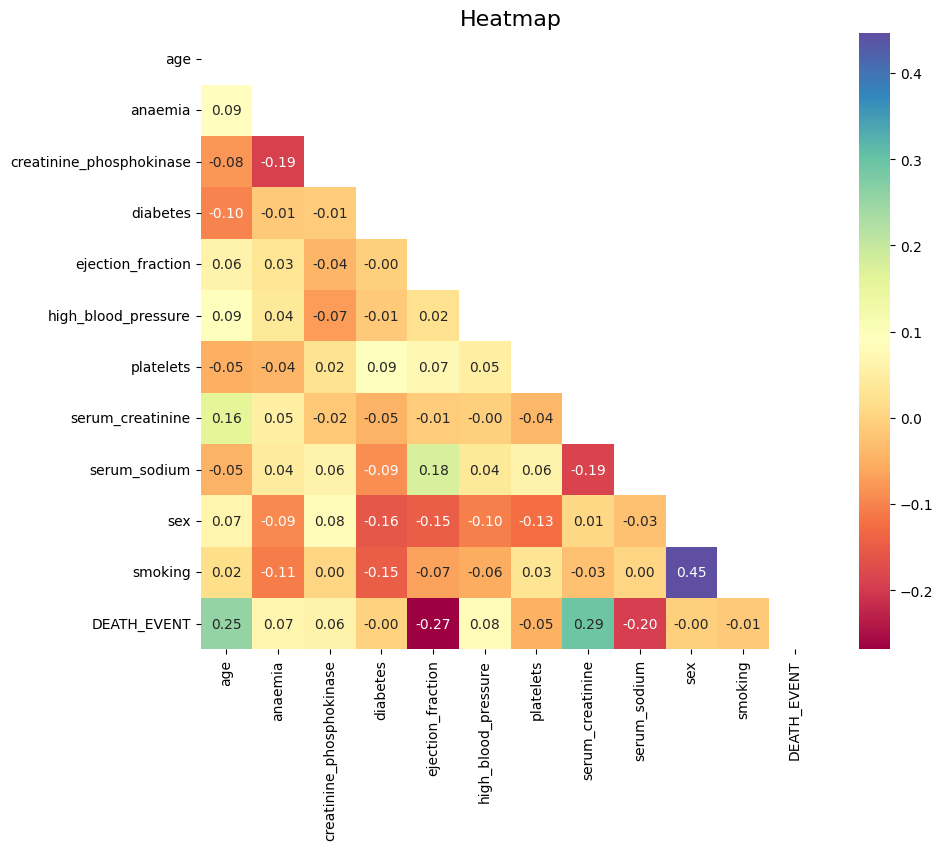

In [5]:
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", mask=mask, cmap="Spectral")
plt.title("Heatmap", fontsize=16)
plt.show()

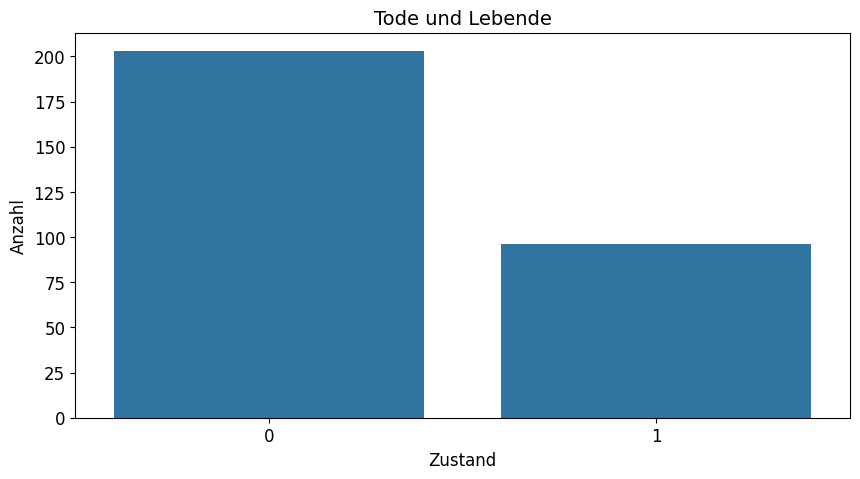

In [24]:
plt.figure(figsize=(10,5))
plt.title('Tode und Lebende', fontsize=14)
sns.countplot(x="DEATH_EVENT", data=df)
plt.xlabel("Zustand", fontsize=12)
plt.ylabel("Anzahl", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [7]:
x = df.drop(columns=['DEATH_EVENT'], axis=1)
y = df['DEATH_EVENT']

In [8]:

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

#### Wahl Gradient Boosting
- Sehr leistungsfähig, besonders bei nicht-linearen und komplexen Mustern
- 

In [26]:
# Modell erstellen
# n_iter_no_change und subsample zum bekämpfen des overfitting
model = GradientBoostingClassifier(n_estimators=60, criterion='friedman_mse', learning_rate=0.1, random_state=75, max_depth=5, n_iter_no_change=8,  subsample=0.9)

# Modell trainieren
model.fit(X_train, y_train)

# Vorhersagen auf Testdaten
y_pred = model.predict(X_test)

# Konfusionsmatrix berechnen
cm = confusion_matrix(y_test, y_pred)
#model.score(X_test, y_test)

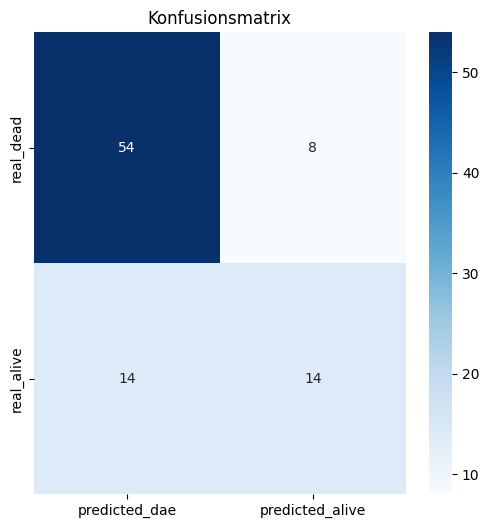

Klassifikationsbericht:
               precision    recall  f1-score   support

           0       0.79      0.87      0.83        62
           1       0.64      0.50      0.56        28

    accuracy                           0.76        90
   macro avg       0.72      0.69      0.70        90
weighted avg       0.75      0.76      0.75        90



In [27]:
# Konfusionsmatrix visualisieren
plt.figure(figsize=(6, 6))
plt.xlabel("Vorhergesagte Klassen")
plt.ylabel("Tatsächliche Klassen")
x_axis_labels = ['predicted_dae', 'predicted_alive'] # labels for x-axis
y_axis_labels = ['real_dead', 'real_alive'] # labels for y-axis
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.title("Konfusionsmatrix")
plt.show()

# Klassifikationsbericht ausgeben
print("Klassifikationsbericht:\n", classification_report(y_test, y_pred))

schneidet schlechter ab???

In [23]:
param_grid = {
    "learning_rate": [0.05, 0.1, 0.2], 
    "max_depth": [3, 5, 7], 
    "n_estimators": [40, 50, 70, 100,],  # Anzahl der Bäume
    "subsample": [0.8, 1.0],  # Anteil der Daten für jeden Baum
    "n_iter_no_change": [8, 10]  # Frühzeitiges Stoppen
}

# sucht nach Verbesserungen in den Parametern, cv ist Faltungen, n_jobs ist für Parallelität, verbose ist für Ausgabe
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring="accuracy")
#das ist gefährlich und führt die Parameteroptimierung durch
#grid_search.fit(X_train, y_train)

# Beste Hyperparameter & beste Genauigkeit
#print("Beste Hyperparameter:", grid_search.best_params_)
#print("Beste Genauigkeit:", grid_search.best_score_)

In [12]:
cvdf = pd.DataFrame.from_dict( grid_search.cv_results_)

cvdf.sort_values("rank_test_score", inplace=True)
cvdf["params"].head()

96     {'learning_rate': 0.2, 'max_depth': 3, 'n_esti...
100    {'learning_rate': 0.2, 'max_depth': 3, 'n_esti...
108    {'learning_rate': 0.2, 'max_depth': 3, 'n_esti...
104    {'learning_rate': 0.2, 'max_depth': 3, 'n_esti...
138    {'learning_rate': 0.2, 'max_depth': 7, 'n_esti...
Name: params, dtype: object

## 2.3Metadaten-Informationen zusammenstellen (Quelle, Zweck der Erhebung, etc.)

## 2.4 Datenqualität beurteilen (fehlende Daten, Redundanz, etc.)

## 2.5 Bereinigung des Datensatzes (Filtern, Schreibfehler, Inkonsistenzen, Zusammenfassung von Attributen,

## 2.6 Umwandlung von Datentypen, etc.)

## 2.7 Festlegung der abhängigen Zielvariable inklusive der Formulierung der Fragestellung

# A3 EDA (20%)

## 3.1 univariate Analyse (z.B. statistische Kennzahlen, Verteilung der numerischen Daten, Verteilung in den kategorialen Variablen)



## 3.2 bi- und multivariate Analyse (z.B. Zusammenhänge zwischen den Variablen)

## 3.3 Ist auf der Basis der Analysen eine weitere Datenbereinigung notwendig? Dokumentieren Sie das, falls zutreffend!

# A4 Modellierung (40%, Bonuspunkte möglich)

## 4.1 Dokumentieren Sie, welches Modell gewählt wurde und warum!

## 4.2 Teilen Sie den Datensatz in Trainings- und Testdaten!

## 4.3 Entwickeln Sie entsprechend des gewählten Ansatzes ein Modell anhand der Trainingsdaten und evaluieren Sie das gefundene Modell!

## 4.4 Wenden Sie das Modell auf die Testdaten an und bewerten Sie das Modell-Ergebnis mittels geeigneter Metriken!

## 4.5 Fassen Sie das Modellergebnis kurz zusammen!

## 4.6 Bewerten Sie die Eigenschaften Ihres Modells hinsichtlich der Fähigkeit zur Generalisierung! Gibt es Hinweise auf Over- oder Underfitting?

# A5 Visualisierung (20%, Bonuspunkte möglich)

# A6 Zusammenfassung und verwendete Quellen (10%)

## 6.1 Fassen Sie die Ergebnisse kurz allgemein zusammen!

## 6.2 Was leisten die gefundenen Modelle hinsichtlich der Untersuchung der gewählten Zielvariable?

## 6.3 Vergleichen und bewerten Sie die verschiedenen genutzten Modellansätze!

## 6.4 Bewerten Sie die Eigenschaften Ihrer Modelle hinsichtlich der Fähigkeit zur Generalisierung!

## 6.5 Gibt es weitere Schwachstellen, Fehlereinflüsse und mögliche Verbesserungsvorschläge für die Modellierung?